In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/EdselSpth/TubesStatistika/faeebfffff64842c560ddaaa4bda44bfe14c67fe/smartphones.csv"
df = pd.read_csv(url)

df.head(10)

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
5,Motorola Moto E32s 4/64GB Gris Libre,Motorola,Moto E32s,4.0,64.0,Gray,Yes,148.52
6,Nothing Phone (2) 12/256GB Blanco Libre,Nothing,Phone (2),12.0,256.0,White,Yes,699.00
7,Realme 9 Pro 5G 8/128GB Negro Libre,Realme,9 Pro,8.0,128.0,Black,Yes,352.59
8,Samsung Galaxy M23 5G 4/128GB Verde Libre,Samsung,Galaxy M23,4.0,128.0,Green,Yes,279.00
9,Xiaomi Redmi Note 12 Pro 8/256GB Gris Grafito ...,Xiaomi,Redmi Note 12,8.0,256.0,Gray,Yes,329.99


In [ ]:
# @title RAM vs Storage

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='RAM', y='Storage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'df' is not defined

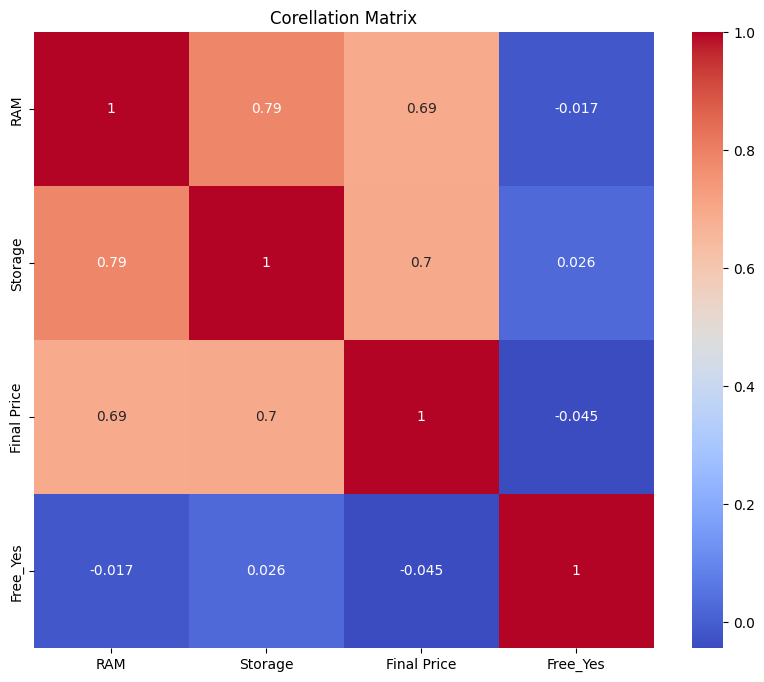

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.get_dummies(df, columns=['Free'], drop_first=True)
df.drop(columns=['Smartphone', 'Brand', 'Model', 'Color'], inplace=True)

corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Corellation Matrix")
plt.show()


              RAM      Storage  Final Price
count  1333.00000  1791.000000  1816.000000
mean      5.96099   162.652150   492.175573
std       2.66807   139.411605   398.606183
min       1.00000     2.000000    60.460000
25%       4.00000    64.000000   200.990000
50%       6.00000   128.000000   349.990000
75%       8.00000   256.000000   652.717500
max      12.00000  1000.000000  2271.280000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB
None


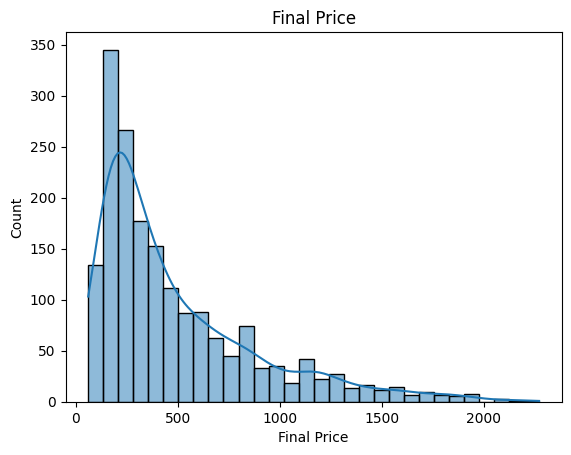

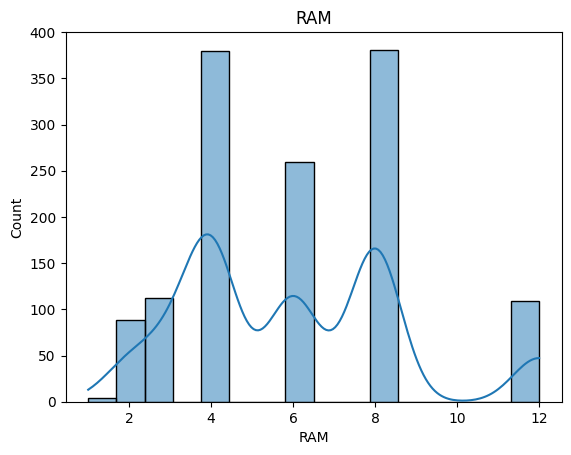

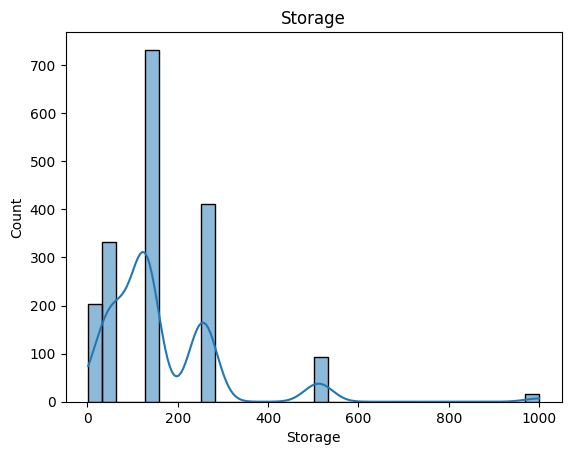

In [ ]:
# Summary statistics
print(df.describe())

# Information about the data types and missing values
print(df.info())

# Visualize the distribution of numerical features
import seaborn as sns
import matplotlib.pyplot as plt

# Final Price
sns.histplot(df['Final Price'].dropna(), kde=True)
plt.title('Final Price')
plt.show()

# RAM
sns.histplot(df['RAM'].dropna(), kde=True)
plt.title('RAM')
plt.show()

#Storage
sns.histplot(df['Storage'].dropna(), kde=True)
plt.title('Storage')
plt.show()


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing 'RAM' values with the median
df['RAM'].fillna(df['RAM'].median(), inplace=True)

# Fill missing 'Storage' values with the mode
df['Storage'].fillna(df['Storage'].mode()[0], inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())


Smartphone       0
Brand            0
Model            0
RAM            483
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64
Smartphone     0
Brand          0
Model          0
RAM            0
Storage        0
Color          0
Free           0
Final Price    0
dtype: int64


In [ ]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['Free'], drop_first=True)

df.drop(columns=['Brand', 'Model', 'Color'], inplace=True)

# Check the dataframe after conversion
df.head(10)


,Smartphone,RAM,Storage,Final Price,Free_Yes
0,Realme C55 8/256GB Sunshower Libre,8.0,256.0,231.60,True
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,4.0,128.0,279.00,True
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,4.0,128.0,179.01,True
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,6.0,128.0,279.99,True
4,Nothing Phone (2) 12/512GB Blanco Libre,12.0,512.0,799.00,True
5,Motorola Moto E32s 4/64GB Gris Libre,4.0,64.0,148.52,True
6,Nothing Phone (2) 12/256GB Blanco Libre,12.0,256.0,699.00,True
7,Realme 9 Pro 5G 8/128GB Negro Libre,8.0,128.0,352.59,True
8,Samsung Galaxy M23 5G 4/128GB Verde Libre,4.0,128.0,279.00,True
9,Xiaomi Redmi Note 12 Pro 8/256GB Gris Grafito ...,8.0,256.0,329.99,True


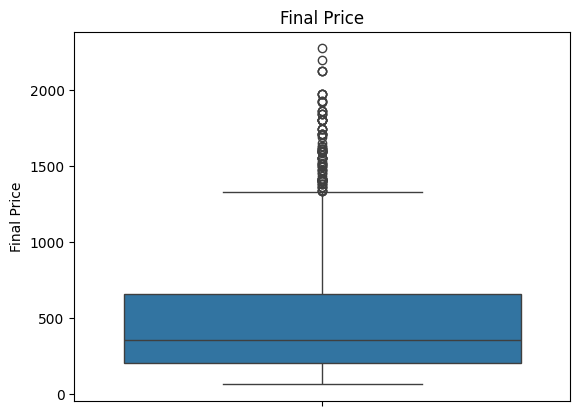

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
5,Motorola Moto E32s 4/64GB Gris Libre,Motorola,Moto E32s,4.0,64.0,Gray,Yes,148.52
6,Nothing Phone (2) 12/256GB Blanco Libre,Nothing,Phone (2),12.0,256.0,White,Yes,699.00
7,Realme 9 Pro 5G 8/128GB Negro Libre,Realme,9 Pro,8.0,128.0,Black,Yes,352.59
8,Samsung Galaxy M23 5G 4/128GB Verde Libre,Samsung,Galaxy M23,4.0,128.0,Green,Yes,279.00
9,Xiaomi Redmi Note 12 Pro 8/256GB Gris Grafito ...,Xiaomi,Redmi Note 12,8.0,256.0,Gray,Yes,329.99


In [ ]:
# Visualize 'Final Price' distribution
sns.boxplot(df['Final Price'])
plt.title('Final Price')
plt.show()

# Handle outliers in 'Final Price'
Q1 = df['Final Price'].quantile(0.25)
Q3 = df['Final Price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = (df['Final Price'] < (Q1 - 1.5 * IQR)) | (df['Final Price'] > (Q3 + 1.5 * IQR))

# Replace outliers with the median
df.loc[outliers, 'Final Price'] = df['Final Price'].median()

# Check the dataframe after handling outliers
df.head(10)

In [ ]:
import statsmodels.api as sm

# Define the independent variables (features) and the dependent variable (target)
X = df[['RAM', 'Storage']]
y = df['Final Price']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Final Price   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     320.1
Date:                Thu, 30 May 2024   Prob (F-statistic):          8.96e-120
Time:                        13:44:58   Log-Likelihood:                -12618.
No. Observations:                1816   AIC:                         2.524e+04
Df Residuals:                    1813   BIC:                         2.526e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3716     16.566      3.765      0.0

In [ ]:
    from scipy import stats

  # Separate the RAM that more than 4GB impact a final price or not
  PriceRam = df[df['RAM'] >= 4]['Final Price']
  PriceNotRam = df[df['RAM'] < 4]['Final Price']

  # Perform an independent t-test
  t_stat, p_value = stats.ttest_ind(PriceRam, PriceNotRam)

  print(f"T-statistic: {t_stat}")
  print(f"P-value: {p_value}")

  # Conclusion
  if p_value < 0.05:
      print("Menolak H0,  dimana terdapat perbedaan yang signifikan terhadap smartphone ram dengan kurang dari 4gb dengan final price")
  else:
      print("Menerima H0, dimana terdapat perbedaan yang signifikan terhadap smartphone dengan ram lebih dari sama dengan 4 gb dengan final price")


T-statistic: 13.060226879180025
P-value: 9.100954961126403e-37
Menolak H0,  dimana terdapat perbedaan yang signifikan terhadap smartphone ram dengan kurang dari 4gb dengan final price
